# Set path - Init

First, define the PYTHONPATH variable appropriately

In [2]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit.signal as bmfs  
import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5

# I ) Background sampling  


## Testing the background sampling  

Few plots of the distribution of angular observables sampled from our background pdfs

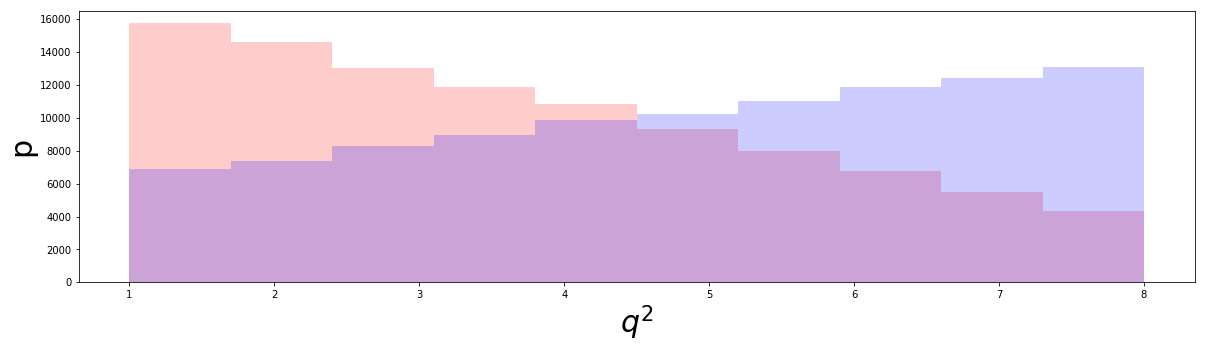

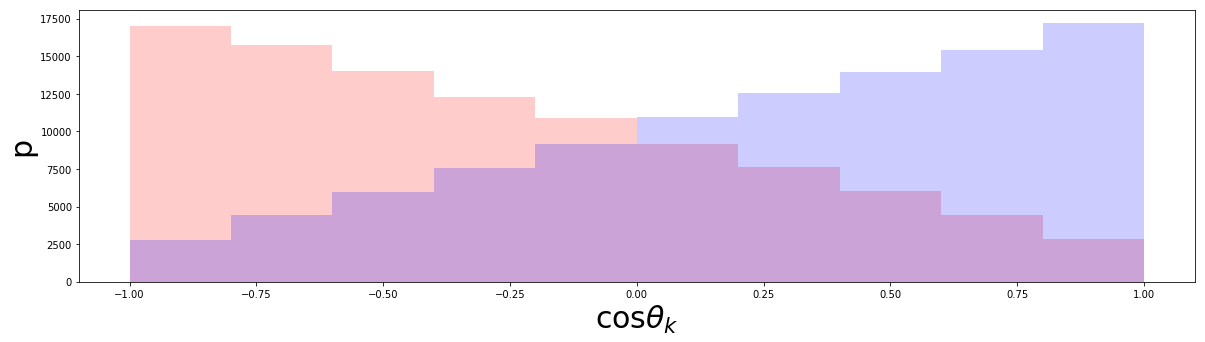

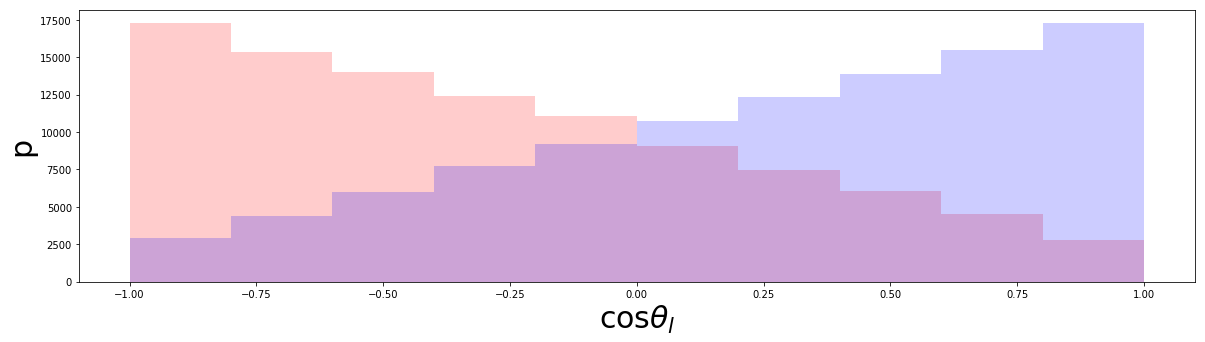

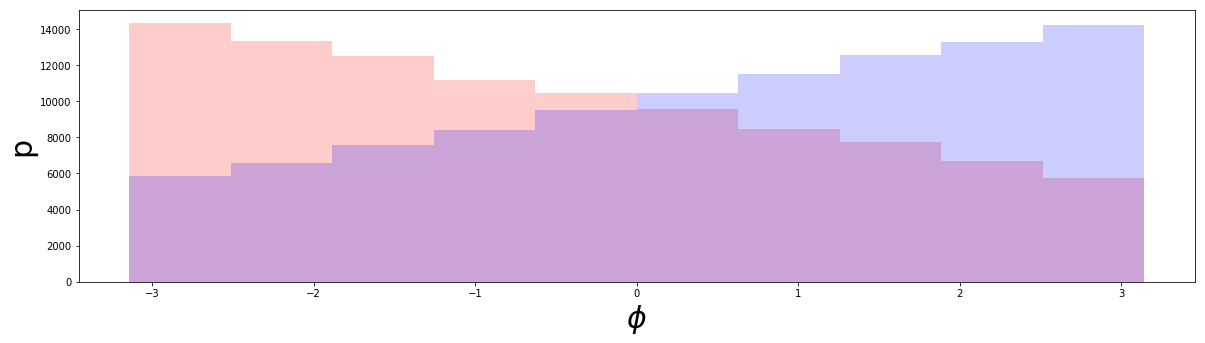

In [3]:
from b_meson_fit.signal import decay_rate 
from b_meson_fit.signal import generate_background 

CoeffBCK0_bis = [
    [55.,+10],
    [100.,+80.],
    [100.,+80.],
    [100,+15]
]

CoeffBCK0 = [
    [100.,-10],
    [100.,-80.],
    [100.,-80.],
    [100,-15]
]

#initial coefficients 
A_SM=bmf.coeffs.fit(bmf.coeffs.fit_initialization_scheme_default , current_signal_model='SM')
CoeffSM=[A_SM[i].numpy() for i in range(len(A_SM))]

A_NP=bmf.coeffs.fit(bmf.coeffs.fit_initialization_scheme_default , current_signal_model='NP')
CoeffNP=[A_NP[i].numpy() for i in range(len(A_NP))]

plt.rcParams["figure.figsize"] = (20,5)
n_bins=10
labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' ]




events_bck0 = generate_background(CoeffBCK0 , events_total=100000)
events_bck1 = generate_background(CoeffBCK0_bis , events_total=100000)

for j in range(4):
    ax=plt.gca()
    plt.hist(events_bck0[:,j] , bins=n_bins , alpha=0.2 , color='r')
    plt.hist(events_bck1[:,j] , bins=n_bins , alpha=0.2 , color='b')
    ax.set_xlabel(labels[j] , fontsize=30 )
    ax.set_ylabel('p' , fontsize=30 )
    plt.show()


## Plotting angular observables  (background included)

Plot the different angular observables and the mass of the $K\pi\mu\mu$ system with background events this time, sampled from linear pdfs. 



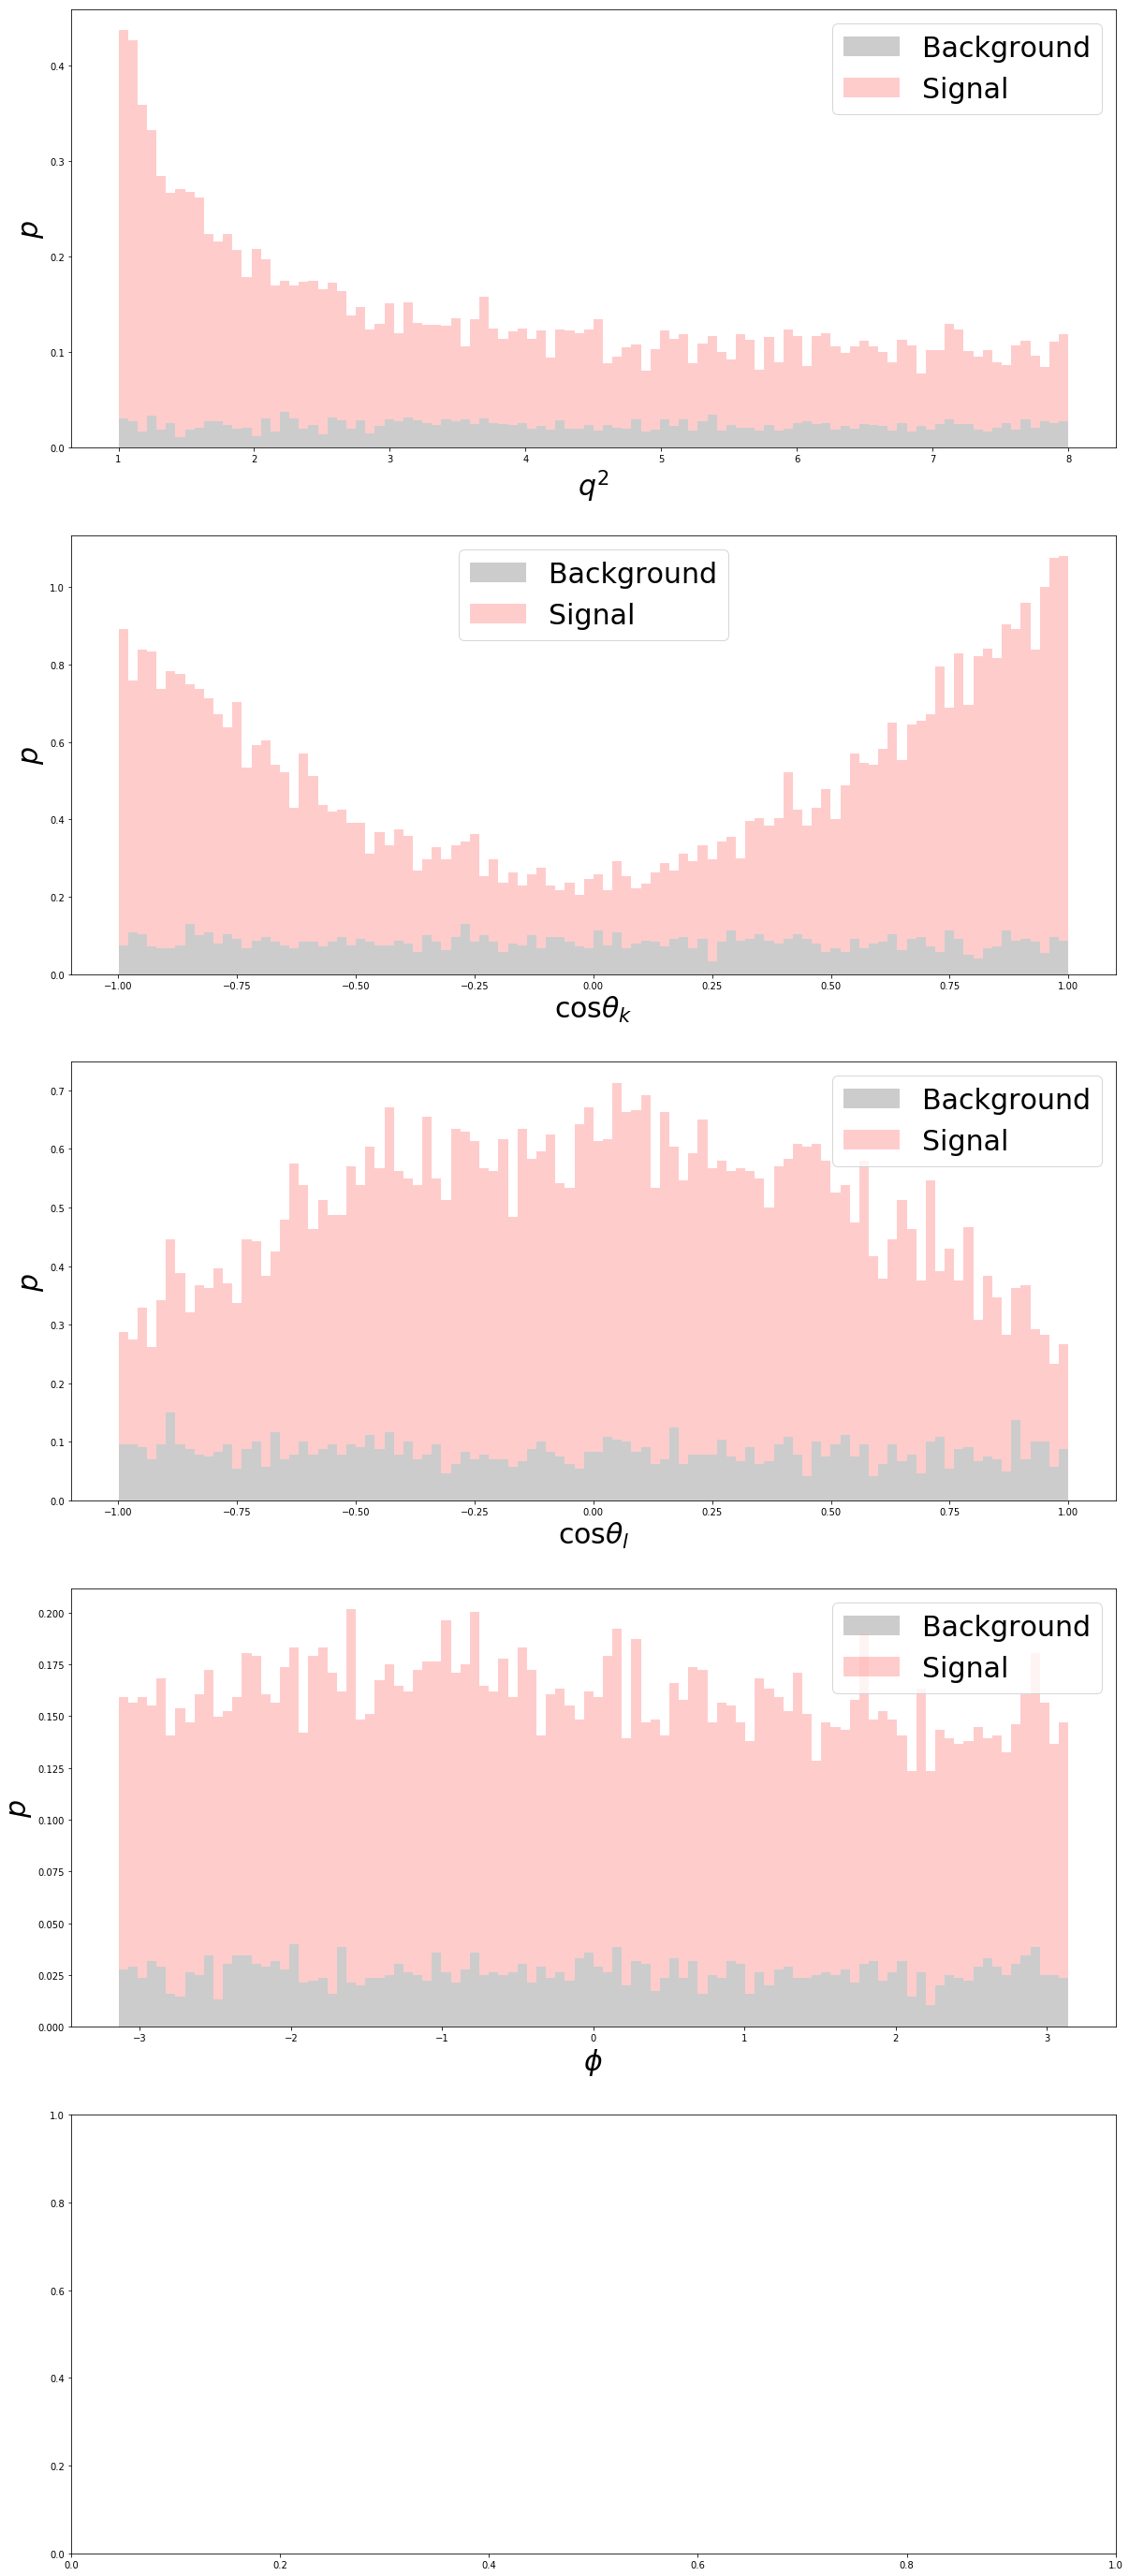

In [16]:
from b_meson_fit.signal import generate_background
from b_meson_fit.signal import generate

import b_meson_fit.signal as bmfs 
import b_meson_fit as bmf 

import tensorflow as tf 


nbins=100
CoeffBCK = [
    [100.,10.],
    [100.,10.],
    [100.,10.],
    [100.,10.]
]
bck = generate_background(CoeffBCK0, events_total=2_000, batch_size=1_000_000)
signal =  generate(CoeffSM, events_total=10_000, batch_size=1_000_000)
mix = tf.concat([bck , signal] , 0)

fig , ax = plt.subplots( 5 , 1)
plt.rcParams["figure.figsize"] = (20,50)


for j in range(4):
    ax[j].hist(  (bck[:,j] , signal[:,j])
             , bins=nbins 
             , stacked=True
             , density=True
             , color= ['black' , 'red' ]
             , label= ['Background' , 'Signal']
             , alpha=0.2)

    ax[j].set_xlabel(labels[j] , fontsize=30)
    ax[j].set_ylabel(r'$p$' , fontsize=30)
    ax[j].legend(fontsize=30)

plt.show()



# II ) The Toy class 

## Signal generation

Now, create a toy and generate 100000 events following the desired model ('SM' & 'NP')

In [6]:
N_events=100_000
frac_bck=0.2
CoeffBCK0 = [
    [0.,100.],
    [0.,100.],
    [0.,100.],
    [0.,100.]
]

CoeffBCK1 = [
    [200.,-100.],
    [200,-100.],
    [200,-100.],
    [200,-100.]
]

#create toys
toySM=toy('SM')
toyNP=toy('NP')
toyMIX=toy('SM')

#generate N_events for both models  
toySM.generate(events=N_events , verbose=True)
toyNP.generate(events=N_events , verbose=True)
toyMIX.generate(events=N_events , frac_background = frac_bck, coeff_background = CoeffBCK0 , verbose=True)



#print(toySM.events)

Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 8.38545536994934
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 8.667859315872192
Ideal coeffs for  SM  :  [-4.

## Plotting angular observables  ( + background)

Plot the different angular observables and the mass of the $K\pi\mu\mu$ system 

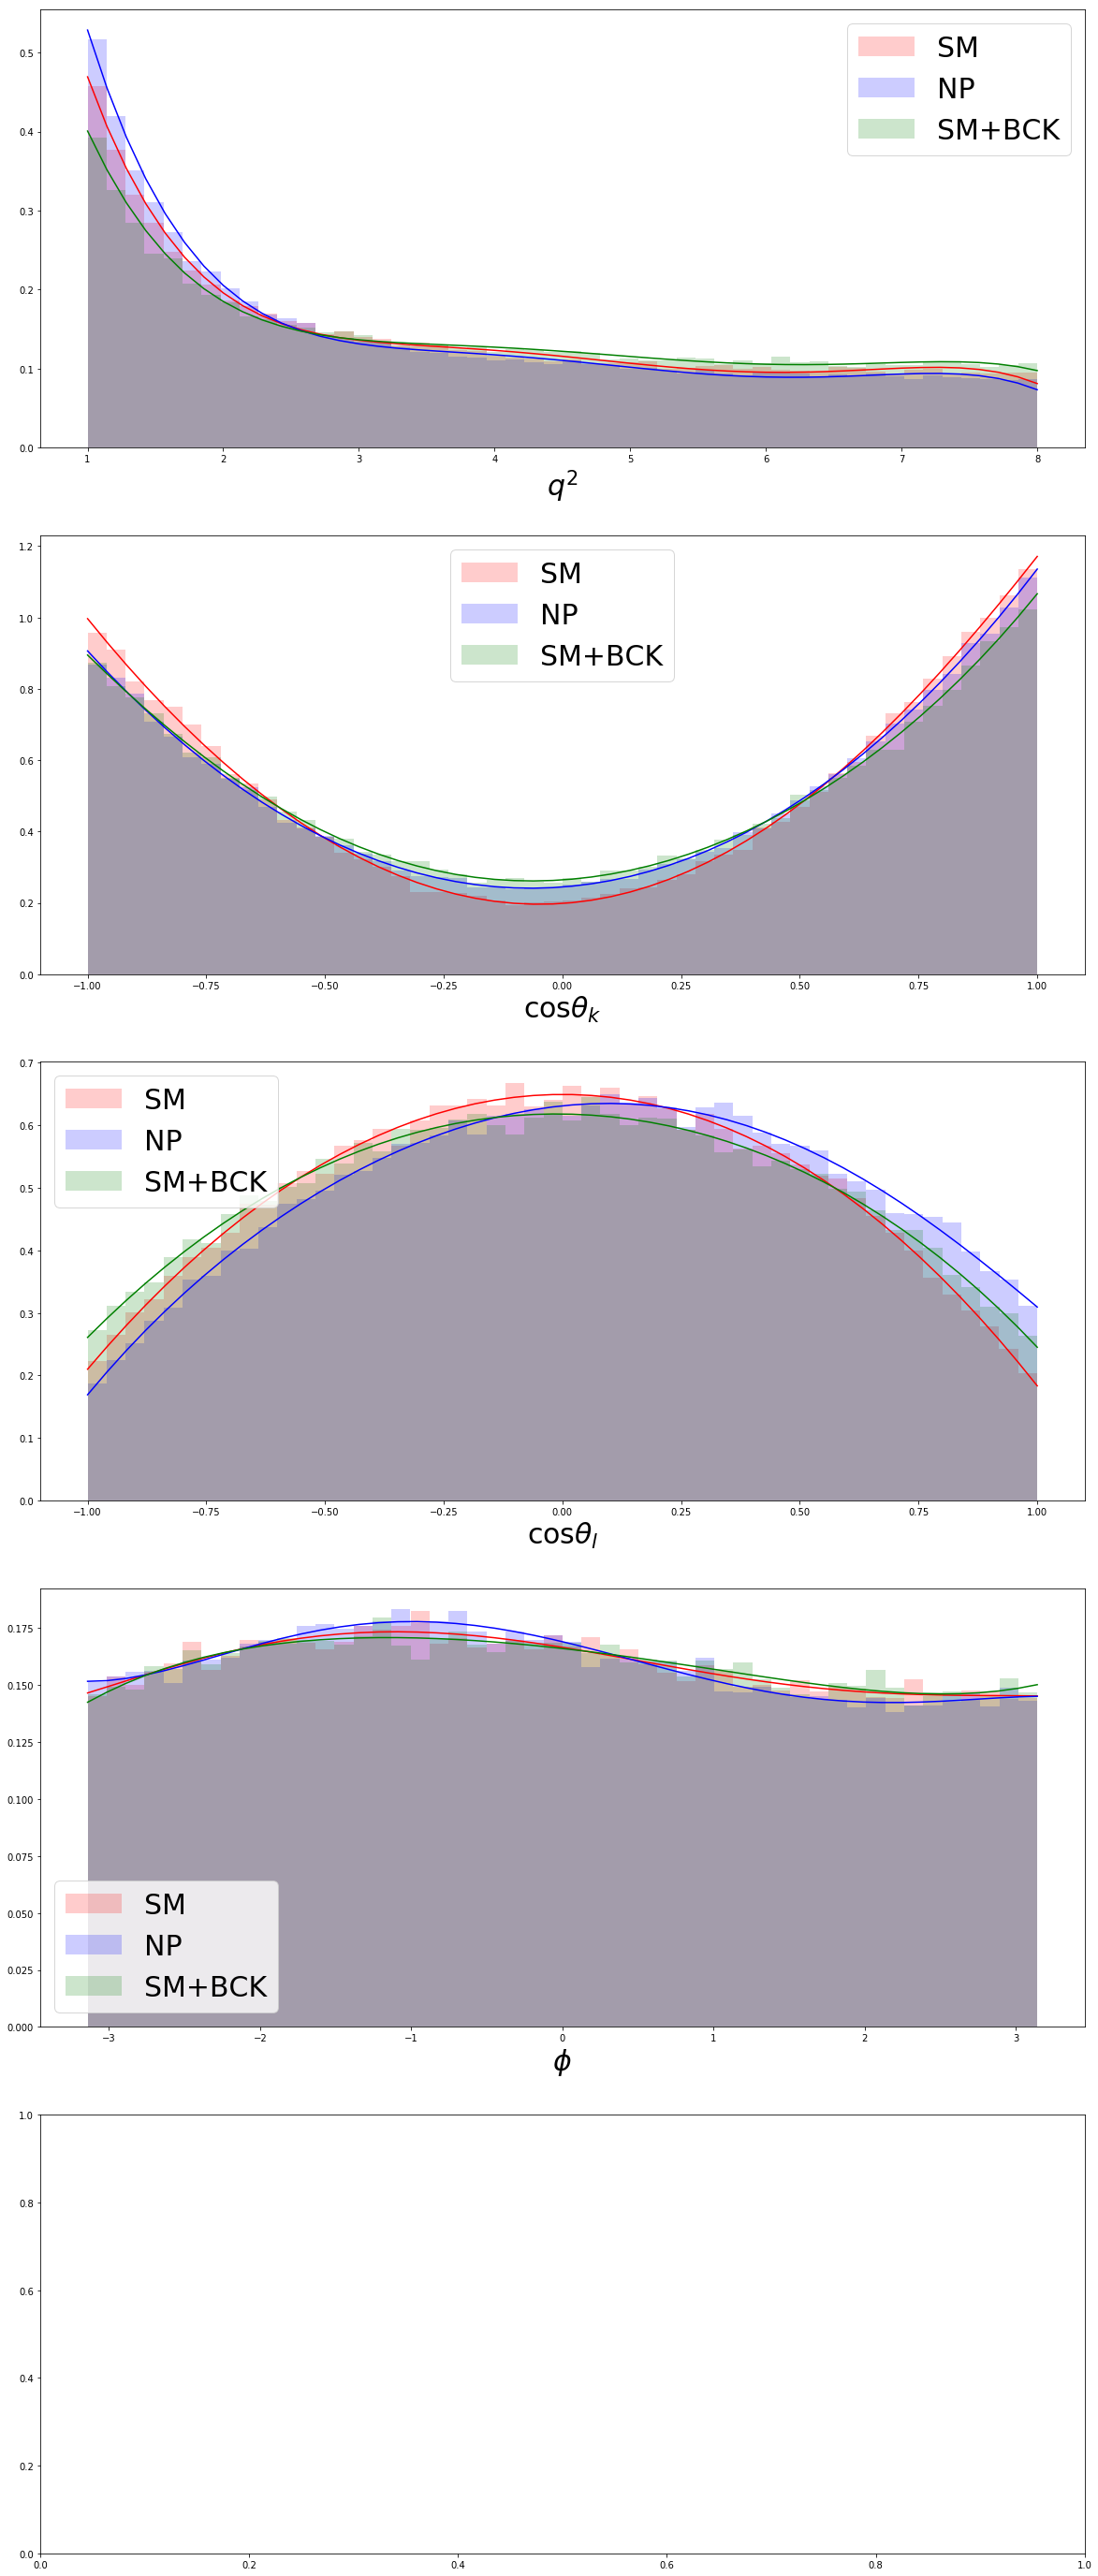

In [17]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d


fig , ax = plt.subplots( 5 , 1)
n_bins=50
Alpha=0.2



#Plot angular observables for SM & NP + interpolation
for j in range(4):
    
    #SM
    n , bins, patches= ax[j].hist(toySM.events[:,j] , bins=n_bins , density=True , color='red' , alpha=Alpha , label='SM')
    centers_SM = 0.5*(bins[1:]+ bins[:-1])
    s_SM = np.polyfit(centers_SM, n , 5)
    p_SM = np.poly1d(s_SM)
    
    #NP 
    n , bins, patches= ax[j].hist(toyNP.events[:,j] , bins=n_bins , density=True , color='blue' , alpha=Alpha , label='NP')
    centers_NP = 0.5*(bins[1:]+ bins[:-1])
    s_NP = np.polyfit(centers_NP, n , 5)
    p_NP = np.poly1d(s_NP)
    
    #MIX
    n , bins, patches= ax[j].hist(toyMIX.events[:,j] , bins=n_bins , density=True , color='green' , alpha=Alpha , label='SM+BCK')
    centers_MIX = 0.5*(bins[1:]+ bins[:-1])
    s_MIX = np.polyfit(centers_MIX, n , 5)
    p_MIX = np.poly1d(s_MIX)
    
    x=np.linspace(min(bins),max(bins))
    
    #plot the whole thing 
    ax[j].plot(x , p_SM(x) , color= 'red')
    ax[j].plot(x , p_NP(x) , color= 'blue')
    ax[j].plot(x , p_MIX(x) , color= 'green')
   
    ax[j].set_xlabel(labels[j] , fontsize=30)
    ax[j].legend(fontsize=30)
    

plt.show()

# III ) Minimizing the NLL 

## ... for only 2 alphas varying 




  0%|          | 0/10 [00:00<?, ?it/s]

[0.01372295 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.02554687 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


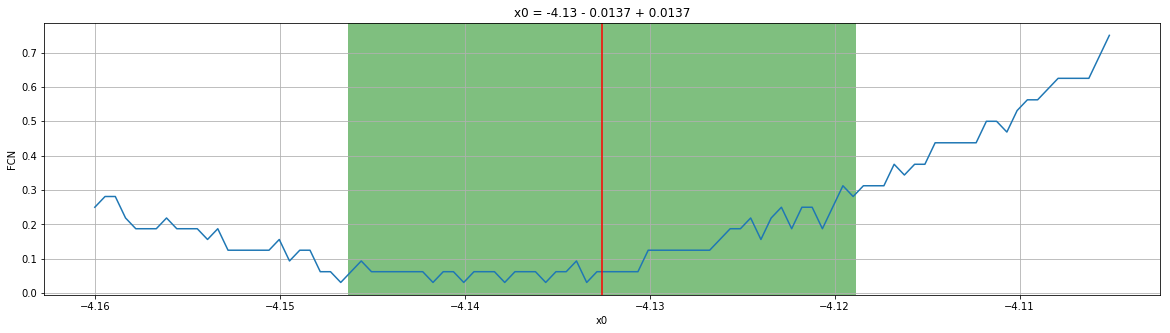


 10%|█         | 1/10 [00:12<01:56, 12.93s/it]

[0.02750708 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03378373 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


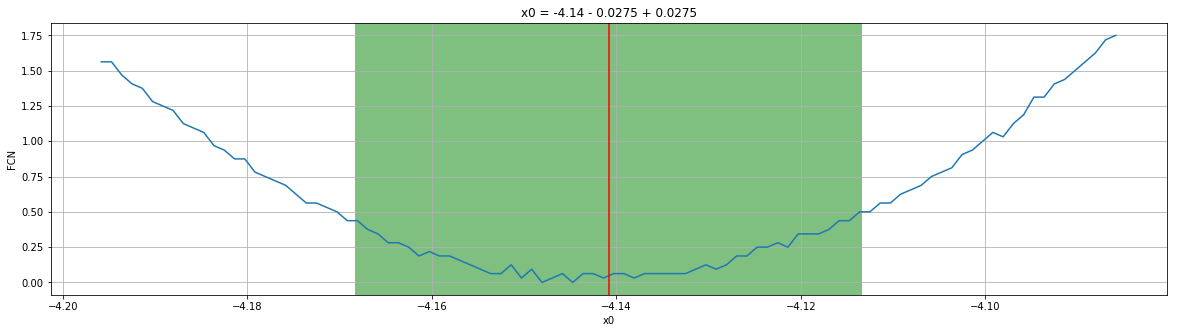


 20%|██        | 2/10 [00:27<01:46, 13.35s/it]

[0.01245859 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.02809276 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


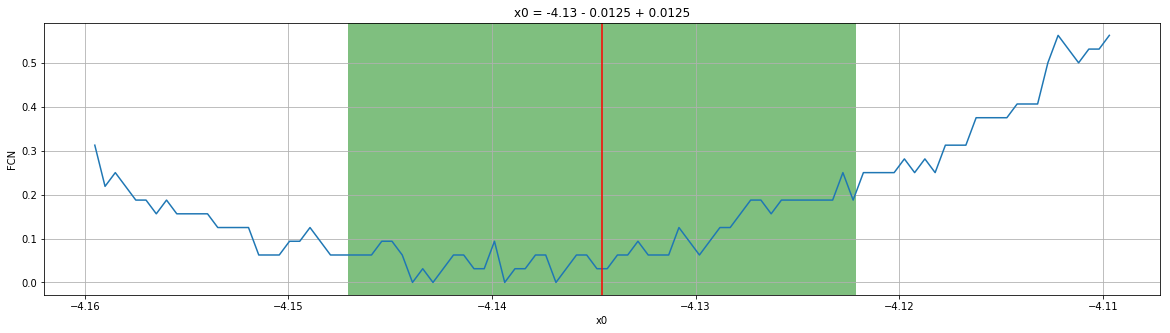


 30%|███       | 3/10 [00:39<01:31, 13.10s/it]

[0.02454534 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03340198 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


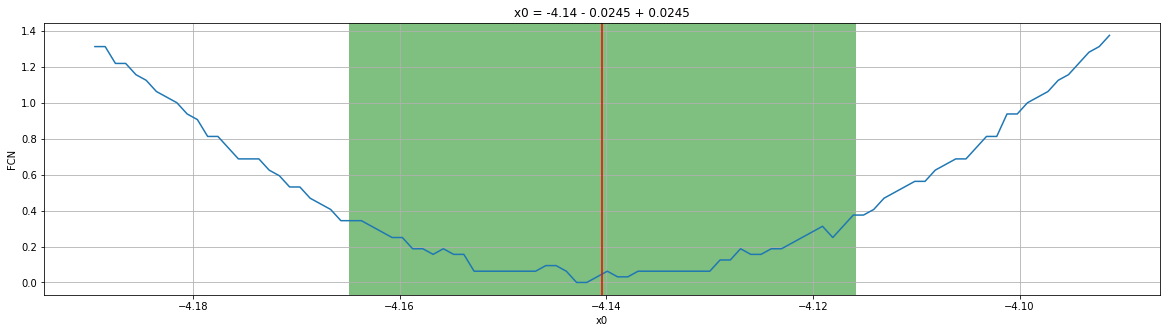


 40%|████      | 4/10 [00:52<01:18, 13.05s/it]

[0.0303797  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03667998 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


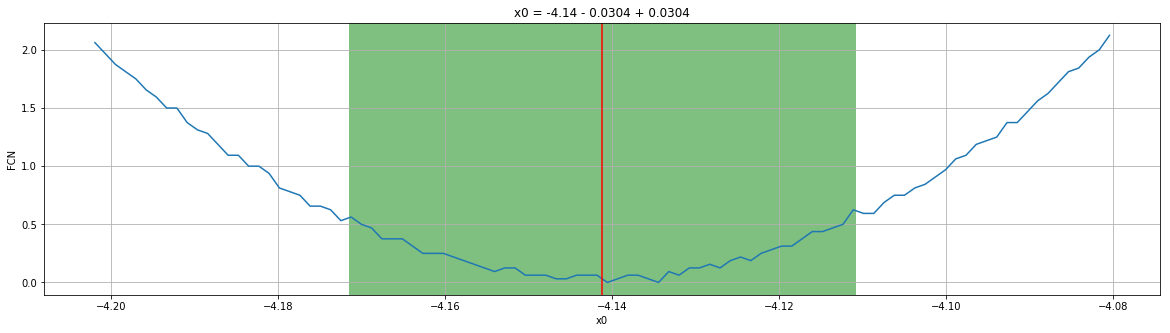


 50%|█████     | 5/10 [01:03<01:02, 12.44s/it]

[0.02467801 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.0342993  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


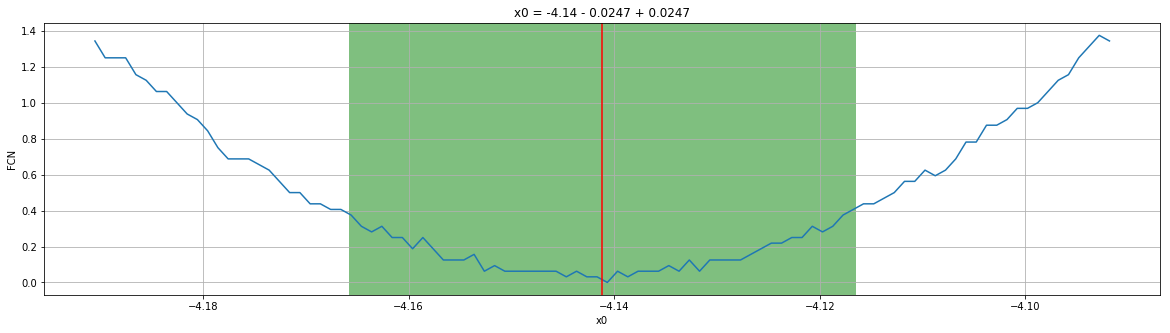


 60%|██████    | 6/10 [01:15<00:48, 12.20s/it]

[0.02760117 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03760567 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


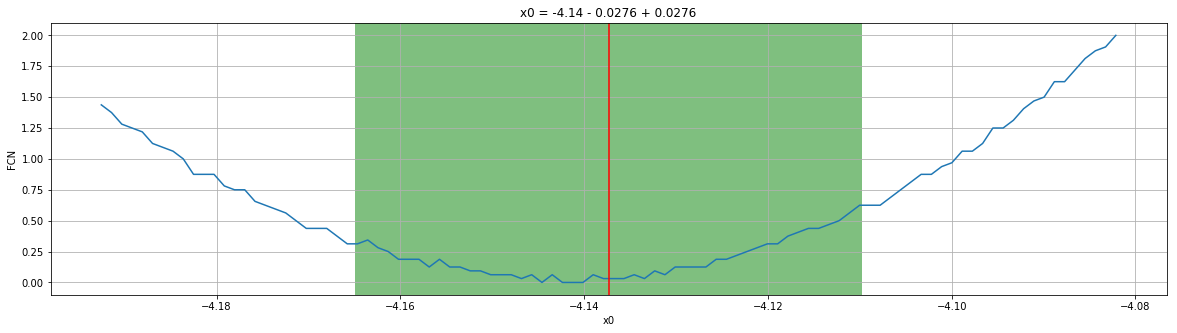


 70%|███████   | 7/10 [01:28<00:37, 12.43s/it]

[0.02952239 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.04325549 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


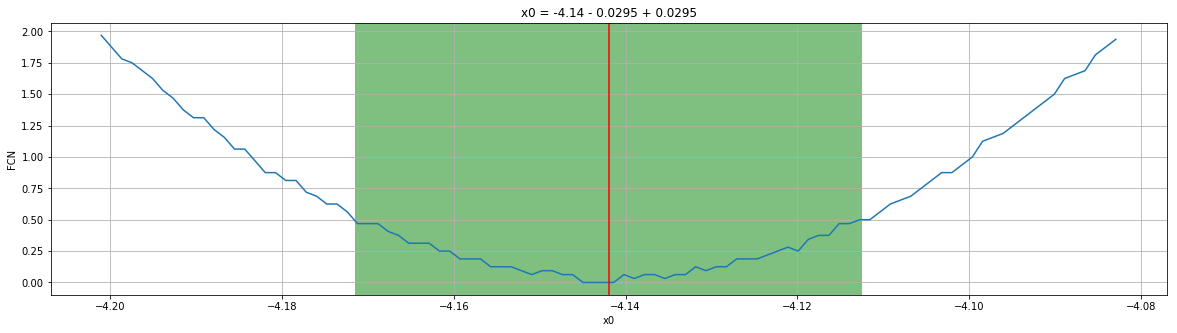


 80%|████████  | 8/10 [01:41<00:25, 12.70s/it]

[0.02629649 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03437036 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


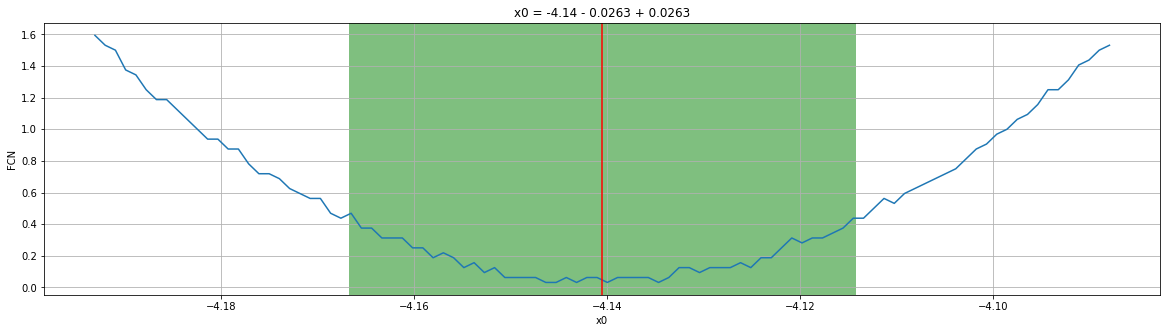


 90%|█████████ | 9/10 [01:55<00:12, 12.91s/it]

[0.02534764 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.03224015 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


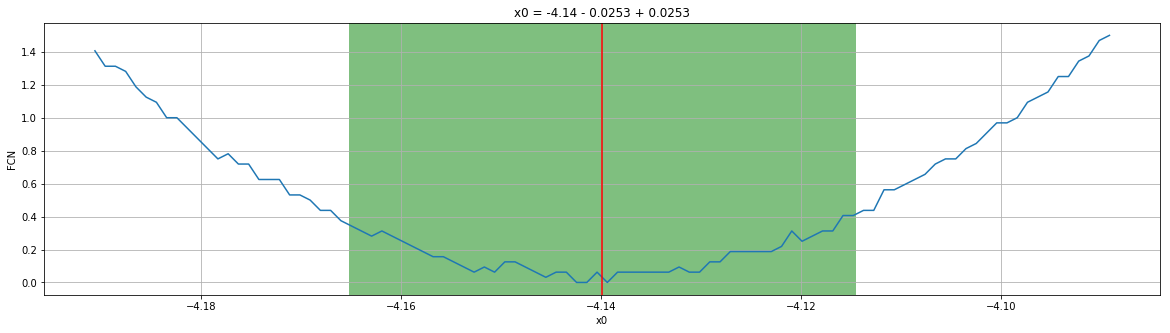


100%|██████████| 10/10 [02:09<00:00, 13.25s/it]

In [89]:
#only two alphas varying, namely ... 
param2=[]
paramTF=[]
paramMIGRAD=[]
paramERRS=[]
MINUIT=[]

#perform 10 tf fits 
nfit=10
for j in tqdm(range(nfit)):
    
    #fit with TF
    optimizer , coeffsTF =toySM.tf_fit(init= 'SAME SIGN' , fixed=fix_one_alpha)
    #finish fit with migrad to get profile errors 
    minuit , coeffsMIGRAD = toySM.minuitfit(Ncall=10000 , init= 'SAME SIGN' , fixed=fix_one_alpha , coefini=coeffsTF)
    
    
    MINUIT.append(minuit)
    paramTF.append(coeffsTF)
    paramMIGRAD.append(coeffsMIGRAD)
    param2.append(coeffsTF)
    paramERRS.append(minuit.np_errors())    
    
    '''
    x , y = minuit.draw_profile('x0' , subtract_min=True)
    plt.show()
    '''
    


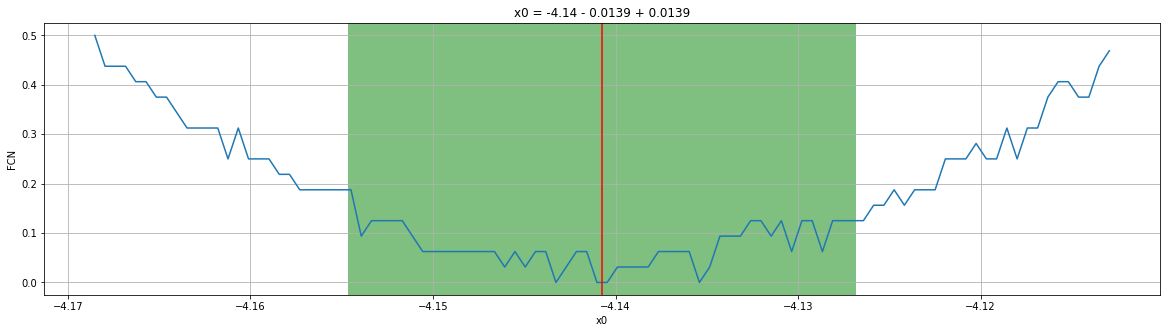

In [82]:
plt.rcParams["figure.figsize"] = (20,5)


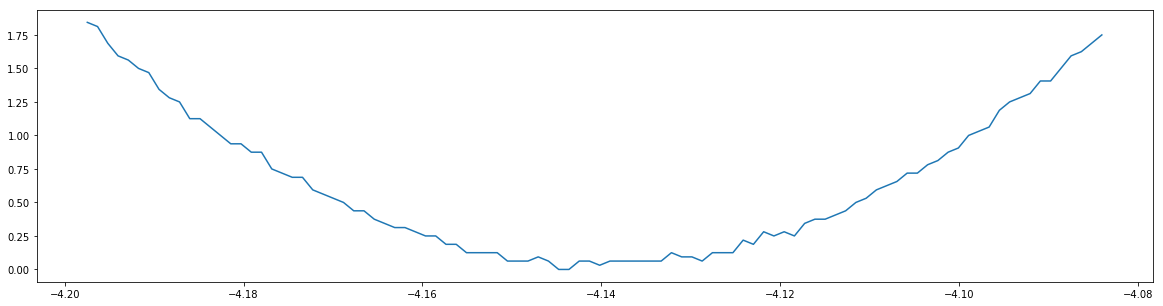

In [78]:
plt.plot(x , y )

INIT :  -4.1781025 
 FIT :  -4.1205063 pm 0.08664365


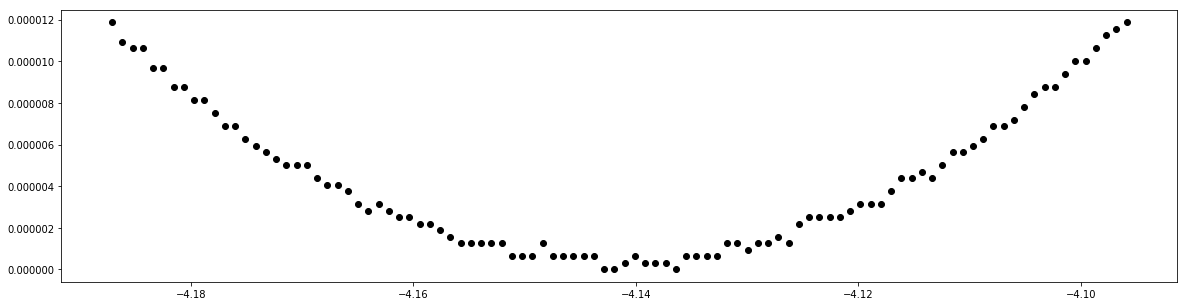

INIT :  7.202759 
 FIT :  7.050824 pm 0.24505906


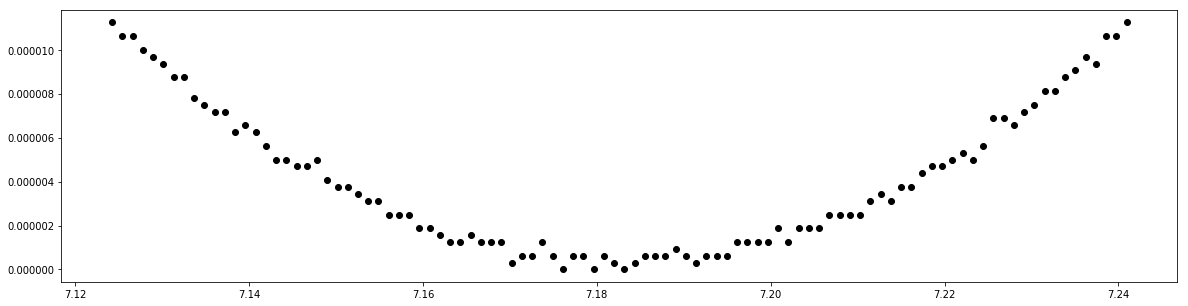

In [86]:
param2=np.asarray(param2)
paramTF=np.asarray(paramTF)
paramMIGRAD=np.asarray(paramMIGRAD)
plt.rcParams["figure.figsize"] = (20,5)
param=paramTF


for j in range(len(param[0])):
    if fix_one_alpha[j]==0:
        vname='x'+str(j)
        x , y = minuit.profile(vname)
        plt.plot(x , (y-min(y))/N_events , 'ok')
        print('INIT : ' , toySM.coeffs[j], '\n' , 'FIT : ' , np.mean(param[:,j]) , 'pm' , np.std(param[:,j]))
        plt.show()

In [37]:
param2=np.asarray(param2)

for j in range(len(param2[0])):
    if fix_one_alpha[j]==0:
        print('INIT : ' , toySM.coeffs[j], '/n' , 'FIT : ' , np.mean(param2[:,j]) , 'pm' , np.std(param2[:,j]))

INIT :  -4.1781025 FIT :  -4.142460564193708 pm 0.0012698375828347633
INIT :  7.202759 FIT :  7.18406568280308 pm 0.002081696490011333


In [38]:
#only alphas varying (12)
param12=[]

nfit=10
for j in tqdm(range(nfit)):
    optimizer , coeffs =toySM.tf_fit(init= 'SAME SIGN' , fixed=fix_alphas)
    param12.append(coeffs)


100%|██████████| 10/10 [01:50<00:00, 11.01s/it]


In [40]:
param12=np.asarray(param12)
for j in range(len(param12[0])):
    if fix_alphas[j]==0:
        print('INIT : ' , toySM.coeffs[j] , 'FIT : ' , np.mean(param12[:,j]) , 'pm' , np.std(param12[:,j]))

INIT :  -4.1781025 FIT :  -4.1322455 pm 0.0017397812
INIT :  0.008585378 FIT :  0.007296792 pm 0.00021377075
INIT :  -0.23538125 FIT :  -0.28170073 pm 0.005438596
INIT :  0.16564202 FIT :  0.23940837 pm 0.0069025382
INIT :  3.8864067 FIT :  3.9126263 pm 0.001895671
INIT :  -0.09505176 FIT :  -0.13405588 pm 0.0016063835
INIT :  -0.4235836 FIT :  -0.47375575 pm 0.004682075
INIT :  7.202759 FIT :  7.1900816 pm 0.006912059
INIT :  1.0 FIT :  0.98905694 pm 0.0009070137
INIT :  1.0 FIT :  0.91501224 pm 0.0016960674
INIT :  1.0 FIT :  1.0549068 pm 0.0014340854
INIT :  1.0 FIT :  1.0131271 pm 0.0029930302


#alphas and betas varying 
param20=[]

nfit=100
for j in tqdm(range(nfit)):
    optimizer , coeffs =toySM.tf_fit(init= 'SAME SIGN' , fixed=fix_alpha_beta)
    param20.append(coeffs)


In [66]:
param20=np.asarray(param20)
for j in range(len(param20[0])):
    if fix_alpha_beta[j]==0:
        print('INIT : ' , toySM.coeffs[j] , 'FIT : ' , np.mean(param20[:,j]) , 'pm' , np.std(param20[:,j])/np.sqrt(nfit))

INIT :  -4.1781025 FIT :  -4.1676817 pm 0.0016759437909848588
INIT :  -0.15184344 FIT :  -0.1543189 pm 0.0009539232292347059
INIT :  0.008585378 FIT :  -0.028465062 pm 0.0002876590170058154
INIT :  -0.0018230017 FIT :  0.015167266 pm 2.158450864317601e-05
INIT :  -0.23538125 FIT :  -0.2796865 pm 0.006505803147401271
INIT :  -0.0043176315 FIT :  -0.011055568 pm 0.0010065330333047184
INIT :  0.16564202 FIT :  0.16759875 pm 0.00035720778789890184
INIT :  -0.013095878 FIT :  -0.017224316 pm 9.775618949080176e-05
INIT :  3.8864067 FIT :  3.9103425 pm 0.001250655659338128
INIT :  0.08526551 FIT :  0.08650838 pm 0.000701784333954051
INIT :  -0.09505176 FIT :  -0.02290822 pm 0.00028764911410514163
INIT :  0.007934013 FIT :  0.0057419077 pm 6.0877925433370276e-05
INIT :  -0.4235836 FIT :  -0.41967463 pm 0.005421512538006319
INIT :  0.027298994 FIT :  0.016760772 pm 0.0006716650112855531
INIT :  7.202759 FIT :  7.219573 pm 0.015007080392164553
INIT :  -0.2278163 FIT :  -0.23629244 pm 0.001268941

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  4.,  2.,  6.,  5., 13., 35., 10.,  3.,  6.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.

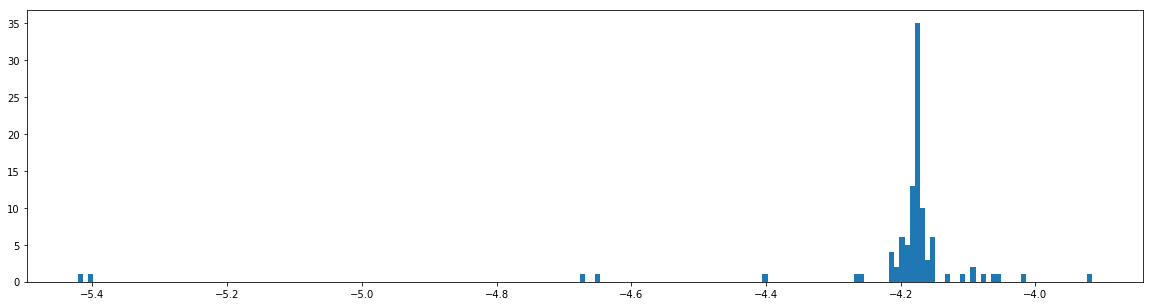

In [41]:
plt.rcParams["figure.figsize"] = (20,5)

plt.hist(A[:,0] , bins=200)



In [15]:
print(A[:,0])

[-4.148828  -4.1554017 -4.146852  -4.150362  -4.1276374 -4.096886
 -4.147189  -4.1501374 -4.1378007 -4.15028   -4.1505356 -4.127638
 -4.149575  -4.147511  -4.169735  -4.147058  -4.1502614 -4.144619
 -4.1523824 -4.1443796 -4.1394625 -4.134529  -4.1608753 -4.160217
 -4.07445   -4.1438437 -4.161678  -3.9779847 -4.169125  -4.144543
 -4.1421676 -4.1361117 -4.147242  -4.1889815 -4.1572776 -4.146269
 -4.1107955 -4.1741204 -4.1493835 -4.1433163 -4.148172  -4.1494517
 -4.099573  -3.8156536 -4.1914473 -4.152438  -4.162375  -4.1524878
 -4.1372313 -4.2300606 -4.218647  -4.1358776 -4.0412645 -4.1440096
 -4.1512322 -4.1862106 -4.1538095 -4.161035  -4.1606326 -4.7341347
 -4.149779  -4.1403594 -4.148771  -4.1468787 -4.1430407 -4.1499243
 -4.147771  -4.1463537 -4.1409845 -4.157785  -4.148906  -4.147593
 -4.14917   -4.134486  -4.148722  -4.197196  -4.152462  -4.148776
 -4.147805  -4.22115   -4.15951   -4.1145988 -4.10115   -4.1511135
 -4.142663  -4.163342  -4.2087665 -4.180467  -4.1416206 -4.15046
 -4.1

(array([33693., 34422., 15727.,  7409.,  4107.,  2390.,  1308.,   666.,
          236.,    42.]),
 array([3.02459412e-05, 6.37816777e-03, 1.27260896e-02, 1.90740114e-02,
        2.54219333e-02, 3.17698551e-02, 3.81177769e-02, 4.44656988e-02,
        5.08136206e-02, 5.71615424e-02, 6.35094643e-02]),
 <a list of 10 Patch objects>)

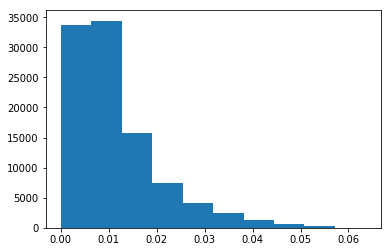

In [5]:
import b_meson_fit.signal as bmfs
A=bmfs.pdf(CoeffSM , toySM.events )

plt.hist(A)